## Q-5.
Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd

data = pd.read_csv("rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [2]:
data.shape

(693071, 57)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
data.isna().sum().sum()

55095

In [5]:
data = data.dropna()

In [6]:
data.isna().sum().sum()

0

In [7]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['id'] = encoder.fit_transform(data.id.values)

data = data.drop(['datetime'], axis=1)
data['timezone'] = encoder.fit_transform(data.timezone.values)
data['source'] = encoder.fit_transform(data.source.values)
data['destination'] = encoder.fit_transform(data.destination.values)
data['cab_type'] = encoder.fit_transform(data.cab_type.values)
data['product_id'] = encoder.fit_transform(data.product_id.values)
data['name'] = encoder.fit_transform(data.name.values)
data['short_summary'] = encoder.fit_transform(data.short_summary.values)
data['long_summary'] = encoder.fit_transform(data.long_summary.values)
data['icon'] = encoder.fit_transform(data.icon.values)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  int32  
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   timezone                     637976 non-null  int32  
 6   source                       637976 non-null  int32  
 7   destination                  637976 non-null  int32  
 8   cab_type                     637976 non-null  int32  
 9   product_id                   637976 non-null  int32  
 10  name                         637976 non-null  int32  
 11  price                        637976 non-null  float64
 12  distance                     637976 non-null  float64
 13 

In [9]:
data.head()

,id,timestamp,hour,day,month,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,165097,1.544953e+09,9,16,12,0,5,7,0,7,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,188776,1.543284e+09,2,27,11,0,5,7,0,11,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,378853,1.543367e+09,1,28,11,0,5,7,0,6,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,485300,1.543554e+09,4,30,11,0,5,7,0,9,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,558249,1.543463e+09,3,29,11,0,5,7,0,10,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [11]:
kmeans.fit(data)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
kmeans.cluster_centers_

array([[ 3.19262070e+05,  1.54500531e+09,  1.15255372e+01,
         1.65065087e+01,  1.20000000e+01,  0.00000000e+00,
         5.49789543e+00,  5.48509319e+00,  5.19882467e-01,
         5.37754498e+00,  5.54722842e+00,  1.65501960e+01,
         2.19216609e+00,  1.01533209e+00,  4.23480872e+01,
        -7.10689442e+01,  3.98705136e+01,  3.47144361e+01,
         4.40011700e+00,  4.83247492e+00,  6.45252212e-03,
         1.49072981e-01,  7.41242099e-01,  7.63025853e+00,
         1.11953125e+01,  1.54500915e+09,  8.62956848e+00,
         4.42116249e+01,  1.54501605e+09,  3.04362806e+01,
         1.54507425e+09,  3.93366207e+01,  1.54501526e+09,
         2.33001549e+01,  1.54506935e+09,  3.24344423e+00,
         3.19259756e+01,  1.01284283e+03,  1.91873585e+02,
         7.37703935e-01,  2.31482478e-01,  8.62956848e+00,
         3.28281046e+02,  1.54499088e+09,  1.54502360e+09,
         3.11643245e-01,  4.28554504e-02,  1.54500835e+09,
         3.52025675e+01,  1.54501337e+09,  4.50805389e+0

In [13]:

kmeans.labels_

array([0, 1, 1, ..., 2, 2, 2])

In [14]:
import numpy as np
unique, counts = np.unique(kmeans.labels_, return_counts=True)


In [15]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 148724, 1: 230860, 2: 168839, 3: 89553}

In [16]:
data["cluster"] = kmeans.labels_

In [17]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'ap

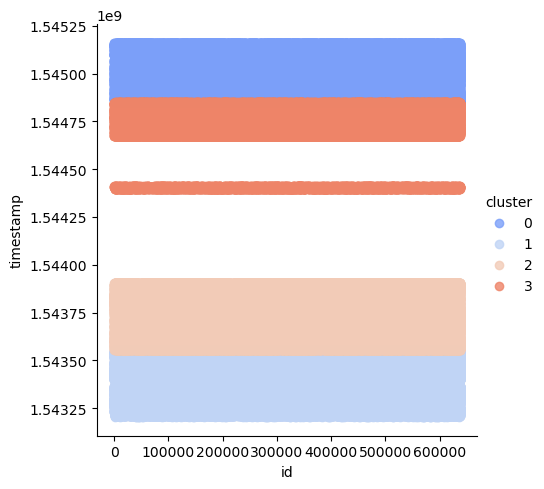

In [18]:
import seaborn as sns
data["cluster"] = kmeans.labels_
sns.lmplot(x='id', y='timestamp', data=data, hue='cluster', palette='coolwarm', aspect=1, fit_reg=False)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict fares for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [20]:
y_pred

array([17.36405659, 12.39056169, 10.50305596, ..., 23.42499105,
       14.05603597, 12.70142898])

In [21]:
mse

39.37242795347388

In [ ]:
import folium

map_center = [42.2148, -71.033]
m = folium.Map(location=map_center, zoom_start=12)

# Mark the high booking areas on the map
for i in range(4):
    cluster_data = data[data['cluster'] == i]
    for _, row in cluster_data.iterrows():
        pickup_location = (row['latitude'], row['longitude'])
        folium.Marker(pickup_location).add_to(m)

# Display the map
m